In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Ruta a tu dataset en Drive (ajústala según tu carpeta)
data_dir = "/content/drive/MyDrive/dataset"

Mounted at /content/drive


In [2]:
import cv2
import os

# Ruta de salida
output_dir = "/content/drive/MyDrive/dataset_cropped"
os.makedirs(output_dir, exist_ok=True)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

for person in os.listdir(data_dir):
    person_path = os.path.join(data_dir, person)
    output_person_path = os.path.join(output_dir, person)
    os.makedirs(output_person_path, exist_ok=True)

    for img_name in os.listdir(person_path):
        img_path = os.path.join(person_path, img_name)
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            face = img[y:y+h, x:x+w]
            face_resized = cv2.resize(face, (128, 128))  # estándar 128x128
            cv2.imwrite(os.path.join(output_person_path, img_name), face_resized)


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,  # Normaliza píxeles
    validation_split=0.15  # 15% para validación
)


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.15
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    output_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    output_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 125 images belonging to 3 classes.
Found 21 images belonging to 3 classes.


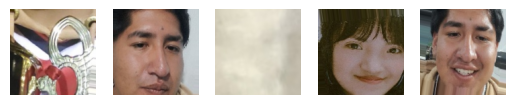

In [6]:
import matplotlib.pyplot as plt

x_batch, y_batch = next(train_generator)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.show()
